<center><h1>Visualization</h1></center>

<h2>Section 1 (Part A)</h2>


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [19]:
#Storing the data from the csv file to a variable called df
df = pd.read_csv('Coffee_Stores_Modified.csv')

#preprocessing the data
df = df.dropna()
df = df.drop_duplicates()
df.head(4)

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales,Temperature,Weather Condition,DriveThru,Weekdays,Holiday
0,18.0,6/29/2019,3000227.0,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,4.0,1.0,4.0,9.0,0.0,3.0,0.00000,-41.0,Raining,0.0,6.0,0.0
1,18.0,6/29/2019,830620.0,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,2.0,1.0,0.0,7.0,1.0,3.0,2.56395,-38.0,Cloudy,0.0,6.0,0.0
2,18.0,6/29/2019,6228.0,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,6.0,0.0,8.0,0.0,0.0,3.0,0.00000,122.0,Cloudy,0.0,6.0,0.0
3,18.0,6/29/2019,12216.0,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,3.0,0.0,0.0,3.0,0.00000,-65.0,Sunny,0.0,6.0,0.0



<h4> Q1. Provide the box plots and statistics of 27 products, inventory patterns, stock out patterns
and missed sales (note: do not rely on the missed sales data in the data set. See part 4
below for more information). </h4>


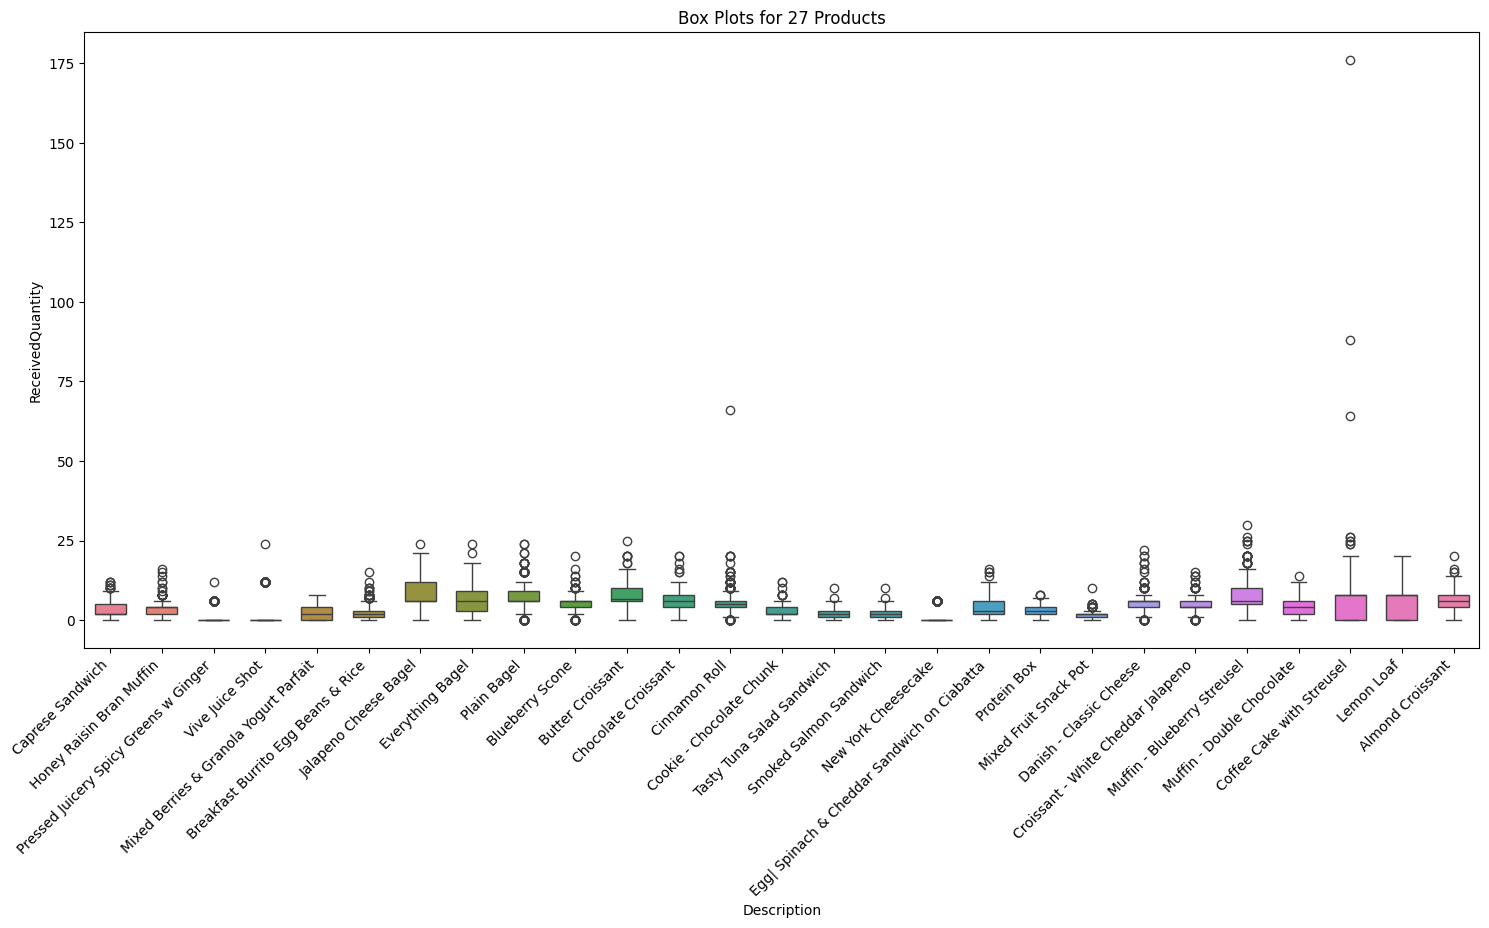

Statistics for Inventory Patterns:
       ReceivedQuantity  SoldQuantity   EndQuantity   LatestOrder
count      28466.000000  28466.000000  28466.000000  28466.000000
mean           4.399600      3.232207      1.955983     10.588210
std            3.770249      2.959146      3.772178      5.798856
min            0.000000      0.000000    -15.000000      0.000000
25%            2.000000      1.000000      0.000000      8.000000
50%            4.000000      3.000000      0.000000     12.000000
75%            6.000000      5.000000      3.000000     15.000000
max          176.000000     22.000000    128.000000     22.000000


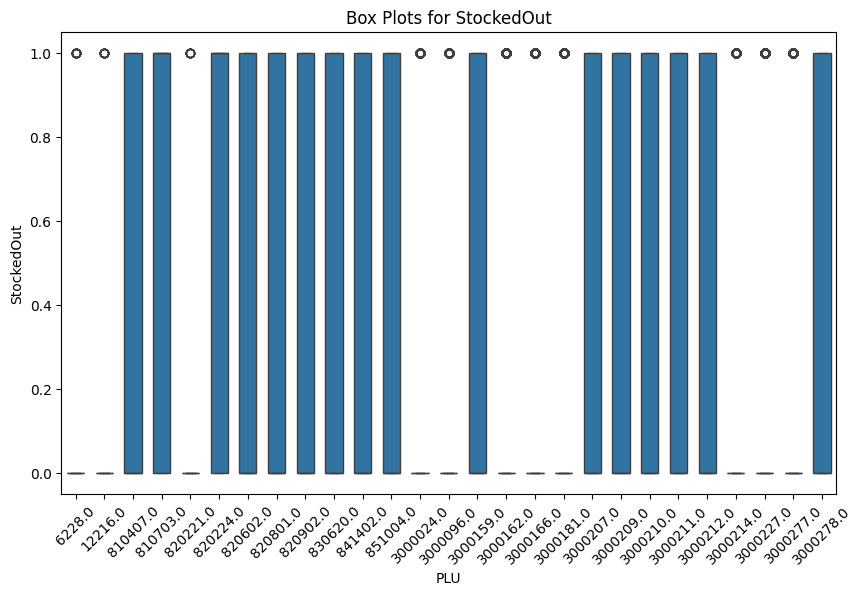

Statistics for Stock Out Patterns:
                                              count      mean       std  min  \
Description                                                                    
Almond Croissant                             1099.0  0.438581  0.496439  0.0   
Blueberry Scone                              1097.0  0.474932  0.499599  0.0   
Breakfast Burrito Egg Beans & Rice           1084.0  0.255535  0.436363  0.0   
Butter Croissant                             1098.0  0.437158  0.496261  0.0   
Caprese Sandwich                             1085.0  0.233180  0.423051  0.0   
Chocolate Croissant                          1097.0  0.510483  0.500118  0.0   
Cinnamon Roll                                1096.0  0.526460  0.499527  0.0   
Coffee Cake with Streusel                    1016.0  0.112205  0.315774  0.0   
Cookie - Chocolate Chunk                      992.0  0.365927  0.481932  0.0   
Croissant - White Cheddar Jalapeno           1098.0  0.416211  0.493154  0.0   
Danis

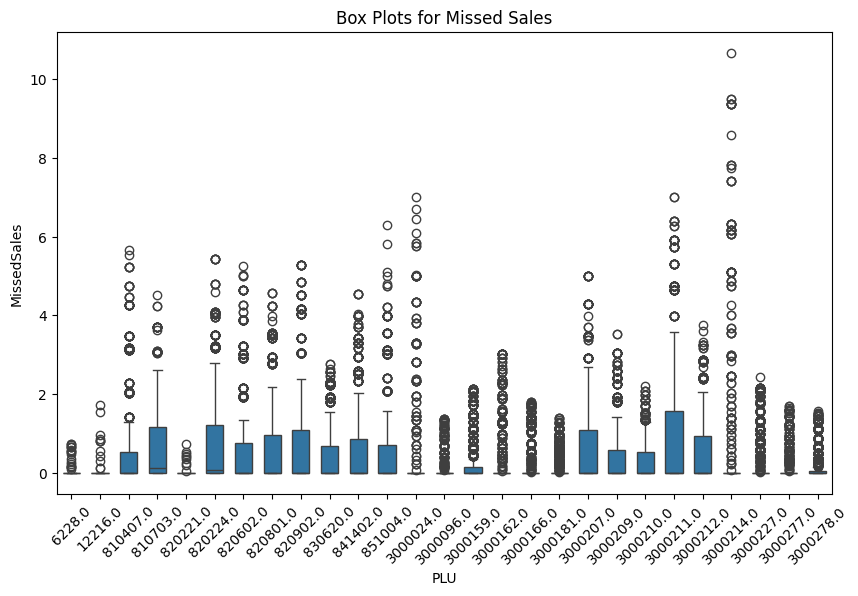

Statistics for Missed Sales:
                                              count      mean       std  min  \
Description                                                                    
Almond Croissant                             1099.0  0.607766  0.997142  0.0   
Blueberry Scone                              1097.0  0.639265  0.992914  0.0   
Breakfast Burrito Egg Beans & Rice           1084.0  0.170019  0.354662  0.0   
Butter Croissant                             1098.0  0.747652  1.229795  0.0   
Caprese Sandwich                             1085.0  0.260654  0.554510  0.0   
Chocolate Croissant                          1097.0  0.776179  1.107332  0.0   
Cinnamon Roll                                1096.0  0.675653  0.929367  0.0   
Coffee Cake with Streusel                    1016.0  0.454641  1.573278  0.0   
Cookie - Chocolate Chunk                      992.0  0.293585  0.478887  0.0   
Croissant - White Cheddar Jalapeno           1098.0  0.459139  0.776431  0.0   
Danish - Cl

In [5]:
#converting BusinessDate to datetime objects.
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

#extracting 27 unique descriptions
products = df['Description'].unique()[:27]

filtered_df = df[df['Description'].isin(products)]

#Box plots for 27 unique products
plt.figure(figsize=(18, 8))
sns.boxplot(data=filtered_df, x='Description', y='ReceivedQuantity', hue='Description', width=0.6)
plt.title('Box Plots for 27 Products')
plt.xticks(rotation=45, ha='right')
plt.show()

#Statistics for the inventory patterns
inventory_stats = filtered_df[['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder']].describe()
print("Statistics for Inventory Patterns:")
print(inventory_stats)

#Box plots for Stockedout vs PLU
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='PLU', y='StockedOut', width=0.6)
plt.xticks(rotation=45)
plt.title('Box Plots for StockedOut')
plt.show()

#Statistics for Stockout patterns
stock_out_stats = filtered_df.groupby('Description')['StockedOut'].describe()
print("Statistics for Stock Out Patterns:")
print(stock_out_stats)

#Box plots for missed sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='PLU', y='MissedSales', width=0.6)
plt.xticks(rotation=45)
plt.title('Box Plots for Missed Sales')
plt.show()

#Statistics for Missed Sales
missed_sales_stats = filtered_df.groupby('Description')['MissedSales'].describe()
print("Statistics for Missed Sales:")
print(missed_sales_stats)


<h4>Q2. Show graphs of best seller and worst seller products of top 25% and bottom 25% and
provide your insight into data. (The average selling price of a product is 3$). Go beyon
graphs and just analyzing data. Think about “So What” when writing your repor</h4>!


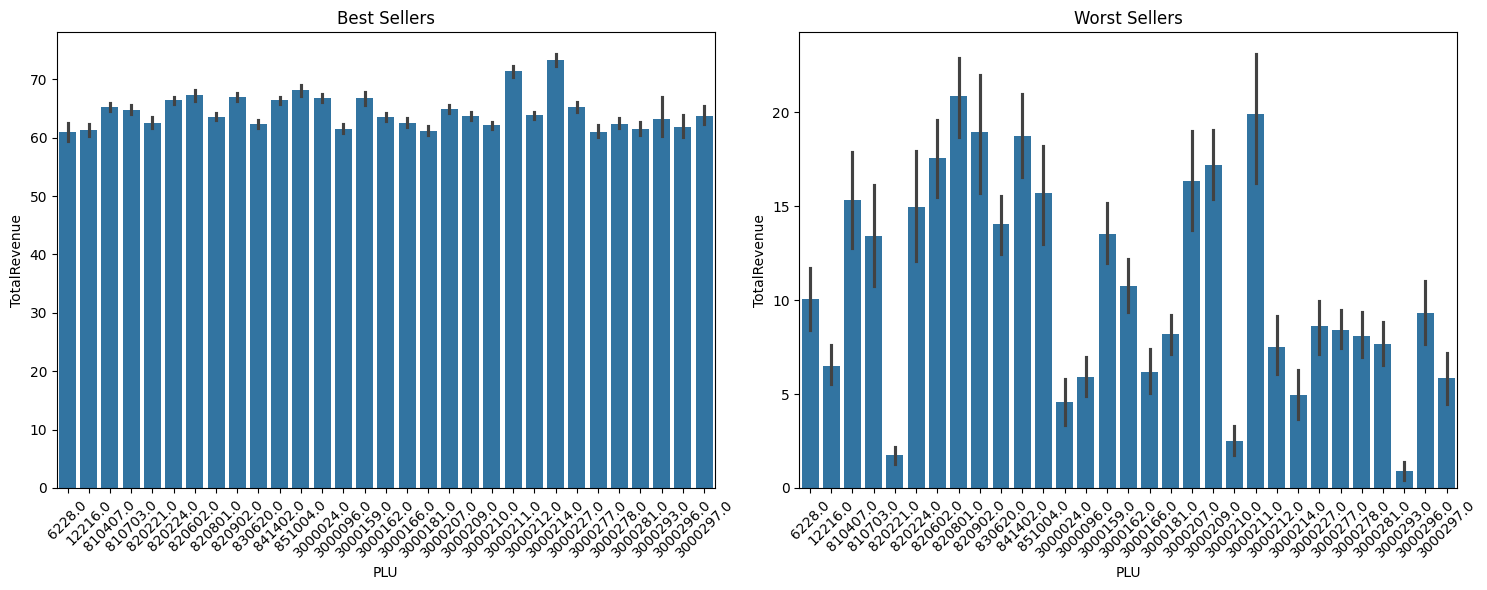

Insights:
Total Revenue: $1240104.00
Revenue from Top 25% of Products: $568839.00 (45.87%)
Revenue from Bottom 25% of Products: $71970.00 (5.80%)


In [6]:
#Calculating TotalSales
df['TotalSales'] = df['SoldQuantity'] + df['LatestOrder']

average_selling_price = 3
#calculating totalrevenue
df['TotalRevenue'] = df['TotalSales'] * average_selling_price

top_25_percent = df['TotalSales'].quantile(0.75)
bottom_25_percent = df['TotalSales'].quantile(0.25)
#top25 percent of best sellers and bottom 25 percent of worst sellers
best_sellers = df[df['TotalSales'] >= top_25_percent]
worst_sellers = df[df['TotalSales'] <= bottom_25_percent]

plt.figure(figsize=(15, 6))
#Bar graph for TotalRevenue vs PLU for bestsellers
plt.subplot(1, 2, 1)
sns.barplot(x='PLU', y='TotalRevenue', data=best_sellers.sort_values('TotalSales', ascending=False))
plt.title('Best Sellers')
plt.xticks(rotation=45)

#Bar graph for TotalRevenue vs PLU for worstsellers
plt.subplot(1, 2, 2)
sns.barplot(x='PLU', y='TotalRevenue', data=worst_sellers.sort_values('TotalSales'))
plt.title('Worst Sellers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

total_revenue = df['TotalRevenue'].sum()
top_25_percent_revenue = best_sellers['TotalRevenue'].sum()
bottom_25_percent_revenue = worst_sellers['TotalRevenue'].sum()

percentage_of_total_revenue_top_25 = (top_25_percent_revenue / total_revenue) * 100
percentage_of_total_revenue_bottom_25 = (bottom_25_percent_revenue / total_revenue) * 100

#Printing insights based on the above data
print("Insights:")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Revenue from Top 25% of Products: ${top_25_percent_revenue:.2f} ({percentage_of_total_revenue_top_25:.2f}%)")
print(f"Revenue from Bottom 25% of Products: ${bottom_25_percent_revenue:.2f} ({percentage_of_total_revenue_bottom_25:.2f}%)")



<h4>Q3. Show graphs of best and worst products based on their inventory management - Top 25%
and bottom 25% and provide your insight into data (the average cost of a product is 0.5$
Identify where/when the store gets rid of the unpurchased products. Go beyond grap s
and just analyzing data. Think about “So What” when writing your report! </
h4>

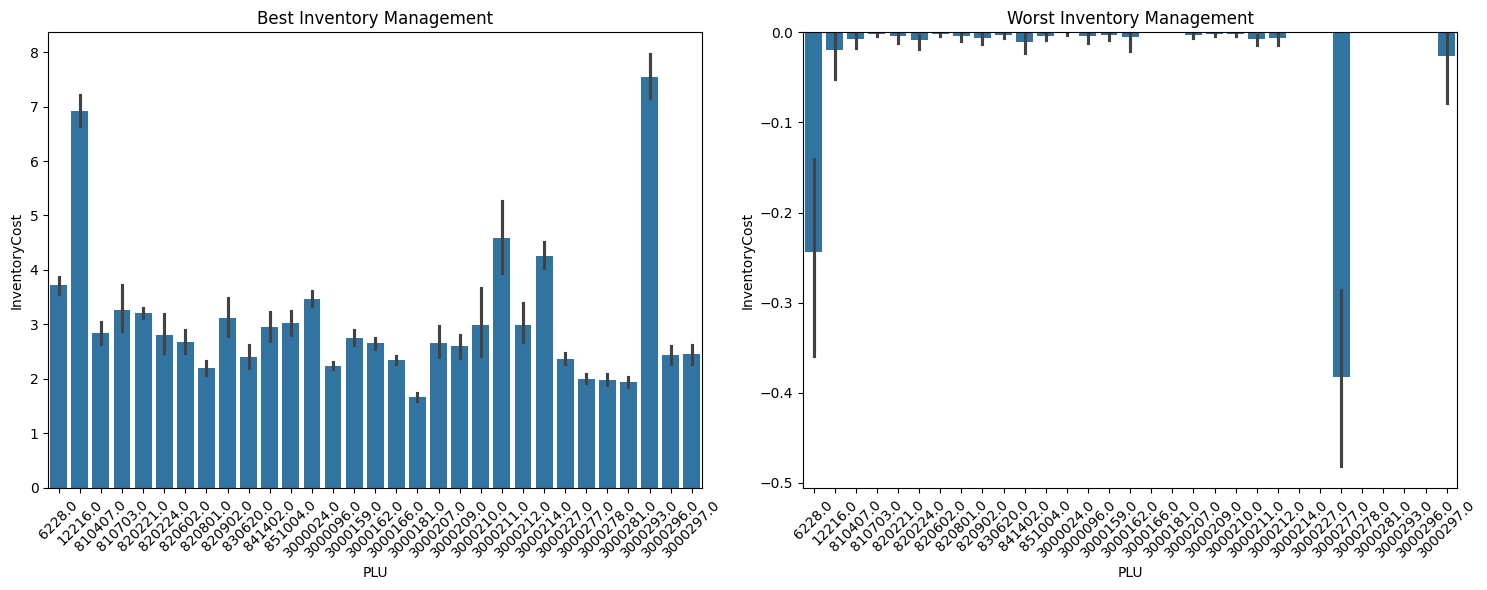



Insights:
Total Number of Unpurchased Products: 17215
Total Cost of Unpurchased Products: $8223.50
Avg Cost per Unpurchased Product: $0.48




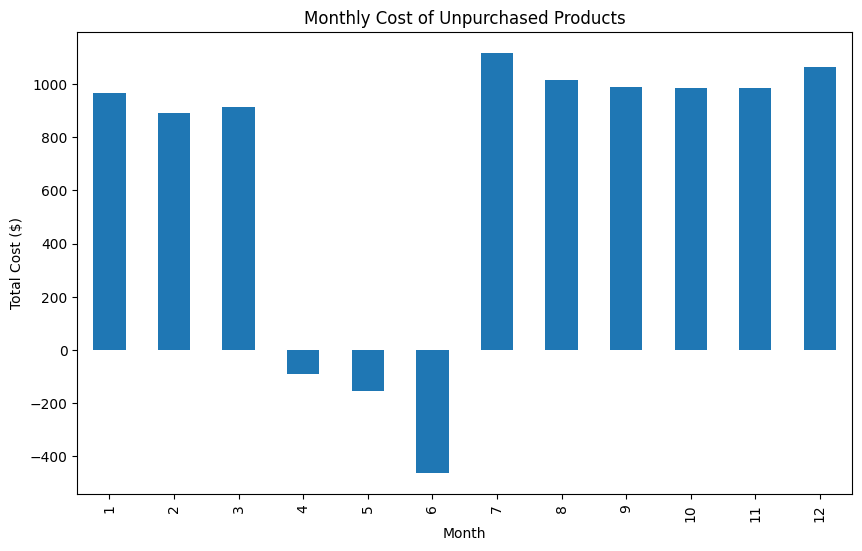

In [7]:
#calculating InventoryCost
df['InventoryCost'] = df['EndQuantity'] * 0.5

top_25_percent_inventory = df['EndQuantity'].quantile(0.75)
bottom_25_percent_inventory = df['EndQuantity'].quantile(0.25)

#calculating best inventory management and worst inventory management
best_inventory_management = df[df['EndQuantity'] >= top_25_percent_inventory]
worst_inventory_management = df[df['EndQuantity'] <= bottom_25_percent_inventory]

plt.figure(figsize=(15, 6))

#Bar graph for Inventory cost vs PLU for best inventory management
plt.subplot(1, 2, 1)
sns.barplot(x='PLU', y='InventoryCost', data=best_inventory_management.sort_values('EndQuantity', ascending=False))
plt.title('Best Inventory Management')
plt.xticks(rotation=45)

#Bar graph for Inventory cost vs PLU for worst inventory management
plt.subplot(1, 2, 2)
sns.barplot(x='PLU', y='InventoryCost', data=worst_inventory_management.sort_values('EndQuantity'))
plt.title('Worst Inventory Management')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n")
unpurchased_products = df[df['EndQuantity'] == 0]
unpurchased_products['EndQuantity'] = df['ReceivedQuantity'] - df['SoldQuantity']
unpurchased_products['InventoryCost'] = unpurchased_products['EndQuantity'] * 0.5

#providing insights based on the above calculated data
print("Insights:")
print(f"Total Number of Unpurchased Products: {len(unpurchased_products)}")
if len(unpurchased_products) > 0:
    print(f"Total Cost of Unpurchased Products: ${unpurchased_products['InventoryCost'].sum():.2f}")
    print(f"Avg Cost per Unpurchased Product: ${unpurchased_products['InventoryCost'].mean():.2f}")
print("\n")

unpurchased_products['Month'] = unpurchased_products['BusinessDate'].dt.month
monthly_unpurchased = unpurchased_products.groupby('Month')['InventoryCost'].sum()

#Bar graph for Monthly cost of unpurchased products
plt.figure(figsize=(10, 6))
monthly_unpurchased.plot(kind='bar')
plt.title('Monthly Cost of Unpurchased Products')
plt.xlabel('Month')
plt.ylabel('Total Cost ($)')
plt.show()

<h4>Q4. Identify stock outs and estimate the loss of sales per year per product. Assume when we aare out of stock, we conservatively lose 75% of th  average of sales in the previous  
weeks on the same weekday. You are welcome to make other reasonable assumption .
Clearly explain your assumption. </h4>

In [10]:
stockouts = df[df['StockedOut'] == 1]

stockouts = stockouts.copy()

def calculate_average_sales(row):
    product_id = row['PLU']
    business_date = row['BusinessDate']
    weekday = business_date.weekday()

    previous_weeks_data = df[(df['PLU'] == product_id) &
                              (df['BusinessDate'] < business_date) &
                              (df['BusinessDate'] >= business_date - pd.DateOffset(weeks=4)) &
                              (df['BusinessDate'].dt.weekday == weekday)]

    average_sales = previous_weeks_data['SoldQuantity'].mean()

    return average_sales

stockouts['AverageSalesPrevious4Weeks'] = stockouts.apply(calculate_average_sales, axis=1)

stockouts['EstimatedLoss'] = 0.75 * stockouts['AverageSalesPrevious4Weeks']
#calculating loss for each product in one year
total_loss_per_product_per_year = stockouts.groupby('PLU')['EstimatedLoss'].sum()
print("Estimated Loss per year grouped by PLU")
print(total_loss_per_product_per_year)


Estimated Loss per year grouped by PLU
PLU
6228.0         13.502976
12216.0        11.050758
810407.0     1540.668561
810703.0     1837.238636
820221.0        3.945833
820224.0     1993.808712
820602.0     1557.992424
820801.0     1593.029167
820902.0     2129.921212
830620.0      759.937121
841402.0     1553.116667
851004.0     1689.867803
3000024.0     245.274621
3000096.0      81.056061
3000159.0     684.195076
3000162.0     283.087121
3000166.0     261.946212
3000181.0     171.508333
3000207.0    1560.908712
3000209.0    1187.642045
3000210.0     475.654167
3000211.0    2573.403409
3000212.0     999.577273
3000214.0     449.277652
3000227.0     460.683712
3000277.0     120.036364
3000278.0     358.726515
3000281.0     191.128950
3000296.0     136.322159
3000297.0      89.487500
Name: EstimatedLoss, dtype: float64


<h4>Assumption Explanation:</h4>

<p>The main assumption in this approach is that when a product goes out of stock, the store loses 75% of its typical sales for the preceding four weeks on the same weekday. This implies that sales trends are fairly stable throughout weekdays and that stockouts have an impact proportionate to recent historical sales.</p>



<h4>Q5. Show graphically how the product sales and inventory waste change. Investigate <br>
a. Impact of day of the week on sales and stocks (7 days </h4>)


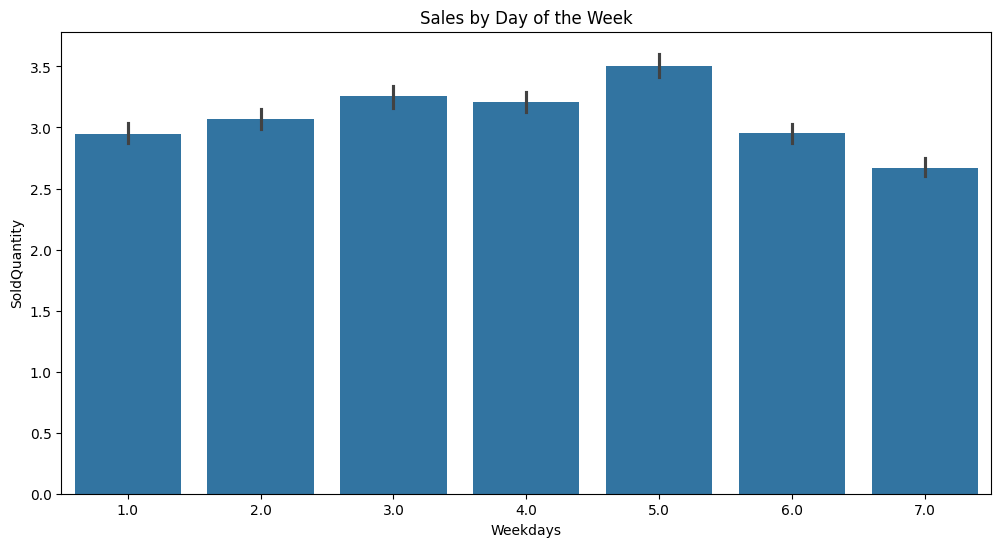

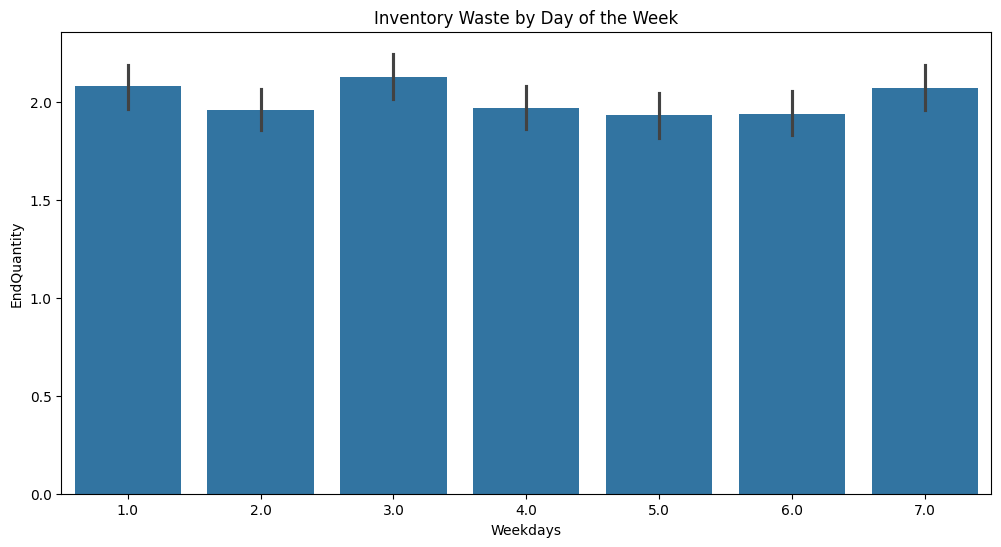

In [9]:
#bar graph for Sales by the day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekdays', y='SoldQuantity', data=df)
plt.title('Sales by Day of the Week')
plt.show()

#bar graph for inventory waste by the day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekdays', y='EndQuantity', data=df)
plt.title('Inventory Waste by Day of the Week')
plt.show()



<h4>b. Monthly changes and patterns (for the duration of the data)</h4>


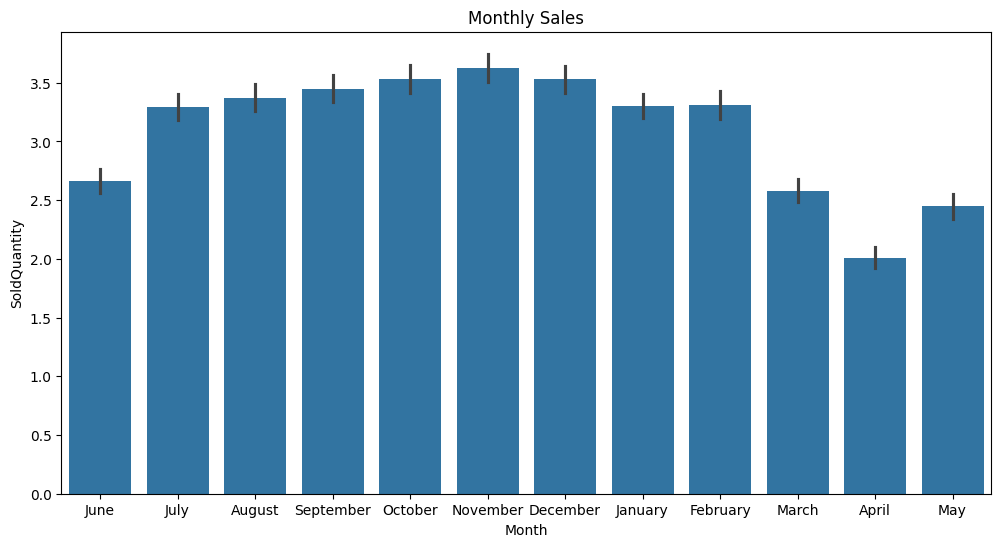

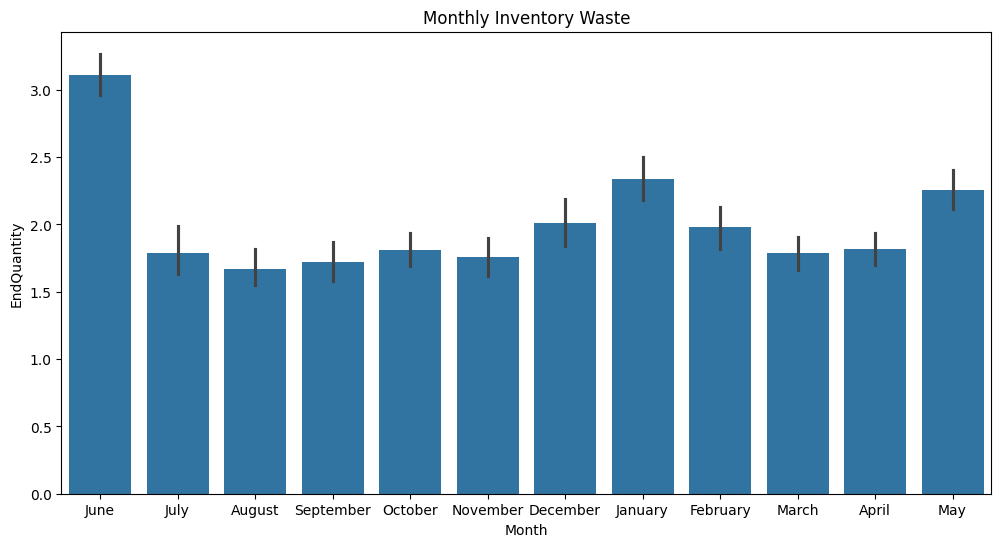

In [11]:
#extracting month from businessdate
df['Month'] = df['BusinessDate'].dt.month_name()

#bar graph for Monthly Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='SoldQuantity', data=df)
plt.title('Monthly Sales')
plt.show()

#bar graph for monthly inventory waste
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='EndQuantity', data=df)
plt.title('Monthly Inventory Waste')
plt.show()


<h4>c. Impact of weather condition based on two factors: </h4><br>
<p>
.. Temperatur<br>e
.i. Weather condition (sunny, raining, cloudy, etc <br>
)
.ii. Find the weather data from publicly available sources and add them as
features to your data set. Weather has shown to have a huge impac  on
s</p>
</h4>

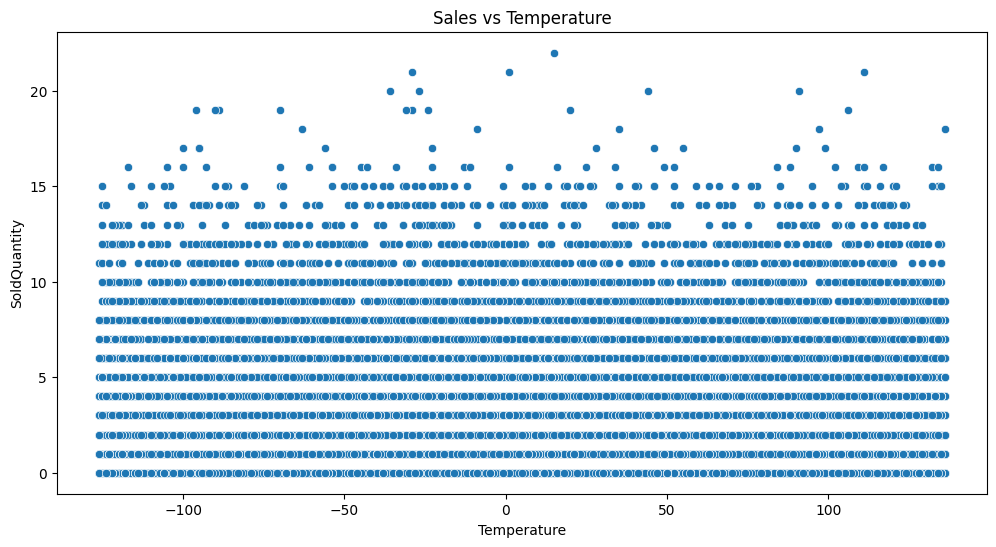

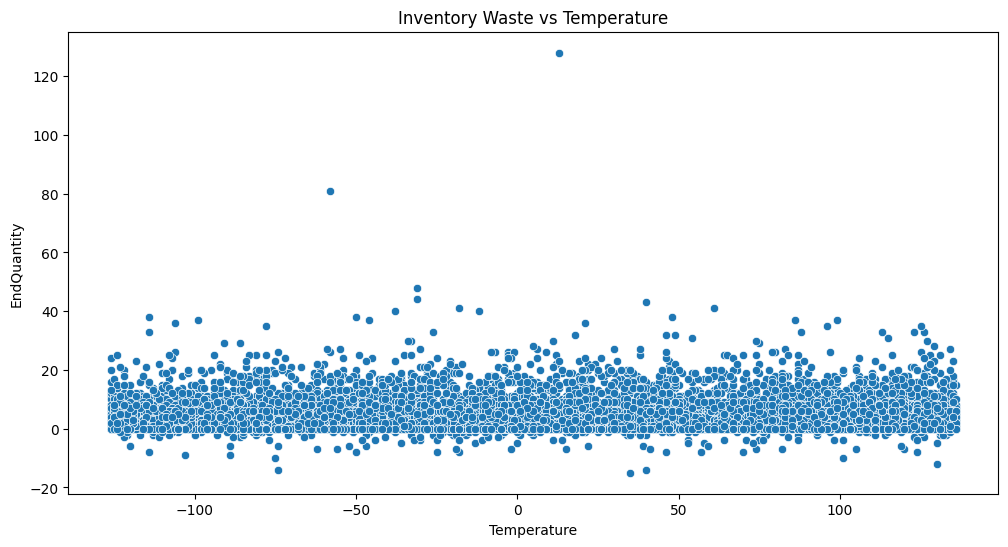

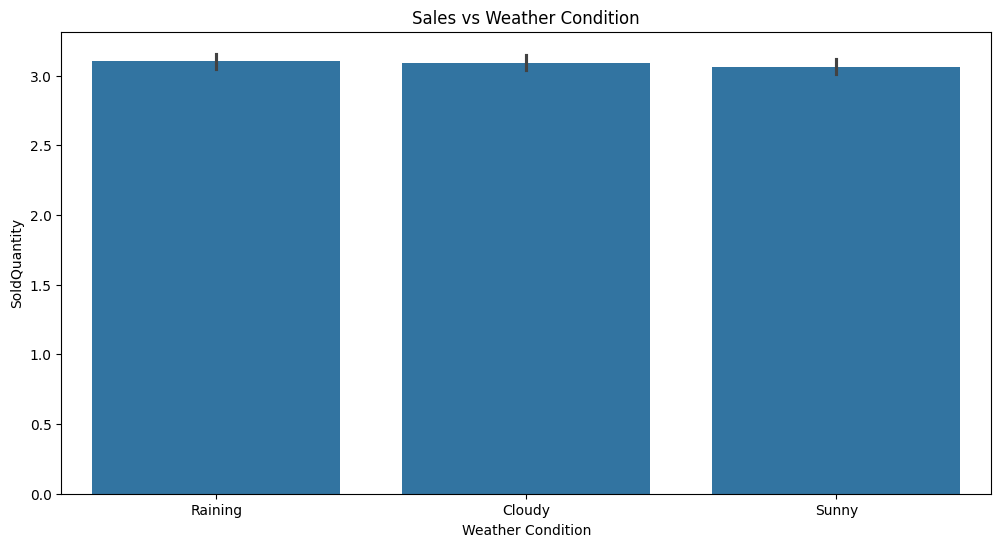

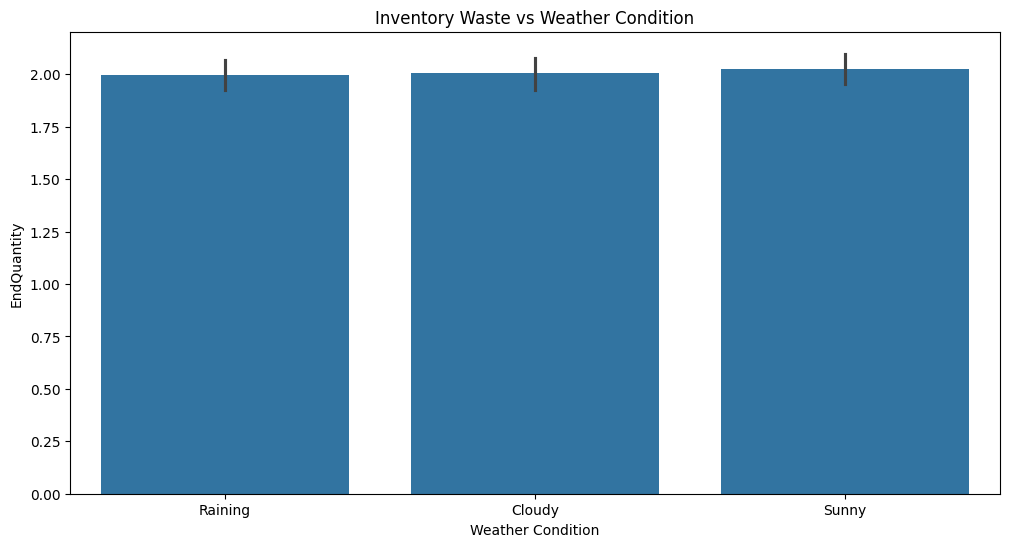

In [12]:
np.random.seed(42)

temperature_column = df['Temperature']
weather_condition_column = df['Weather Condition']

# Plot sales vs temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x=temperature_column, y='SoldQuantity', data=df)
plt.title('Sales vs Temperature')
plt.show()

# Plot inventory waste vs temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x=temperature_column, y='EndQuantity', data=df)
plt.title('Inventory Waste vs Temperature')
plt.show()

# Plot sales and inventory waste based on weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_condition_column, y='SoldQuantity', data=df)
plt.title('Sales vs Weather Condition')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=weather_condition_column, y='EndQuantity', data=df)
plt.title('Inventory Waste vs Weather Condition')
plt.show()


<h4>Q6. Investigate whether drive thru feature causes certain products to sell better or worse.</h4>

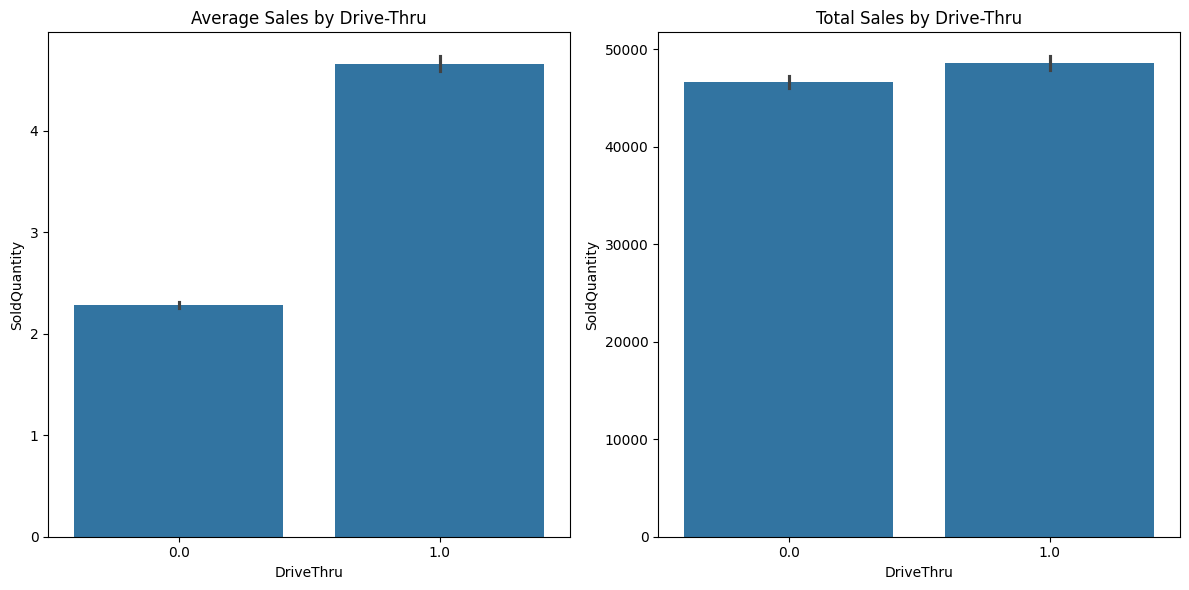

In [13]:
#calculating drive_thru and non_drive_thru data
drive_thru_df = df[df['DriveThru'] == '0']
non_drive_thru_df = df[df['DriveThru'] == '1']

plt.figure(figsize=(12, 6))

#Bar graph for Average sales by DriveThru
plt.subplot(1, 2, 1)
sns.barplot(x='DriveThru', y='SoldQuantity', data=df)
plt.title('Average Sales by Drive-Thru')

#Bar graph for Total sales by DriveThru
plt.subplot(1, 2, 2)
sns.barplot(x='DriveThru', y='SoldQuantity', estimator=sum, data=df)
plt.title('Total Sales by Drive-Thru')

plt.tight_layout()
plt.show()


<h4>Q7. Investigate the impact of weekday/weekends and National Holidays by adding extra
features.</h4>

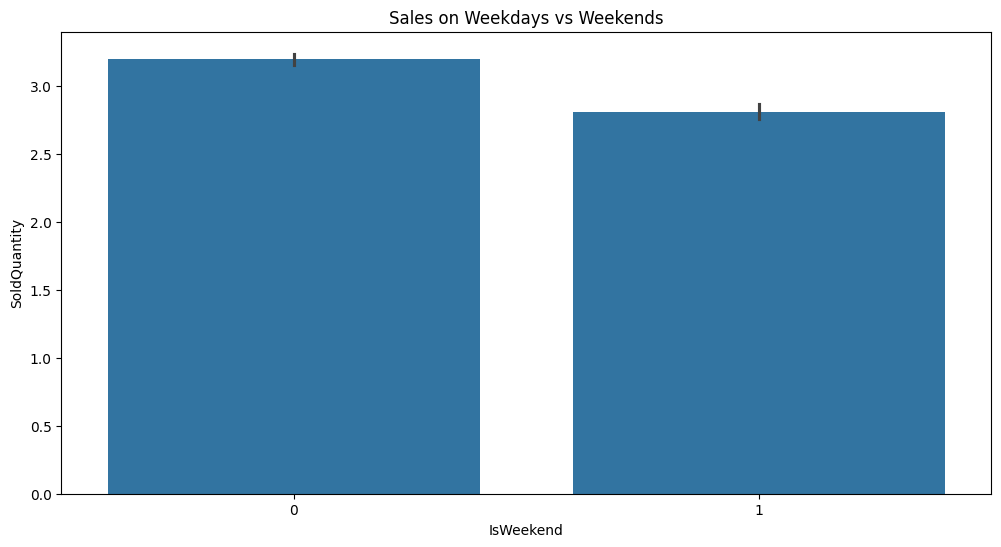

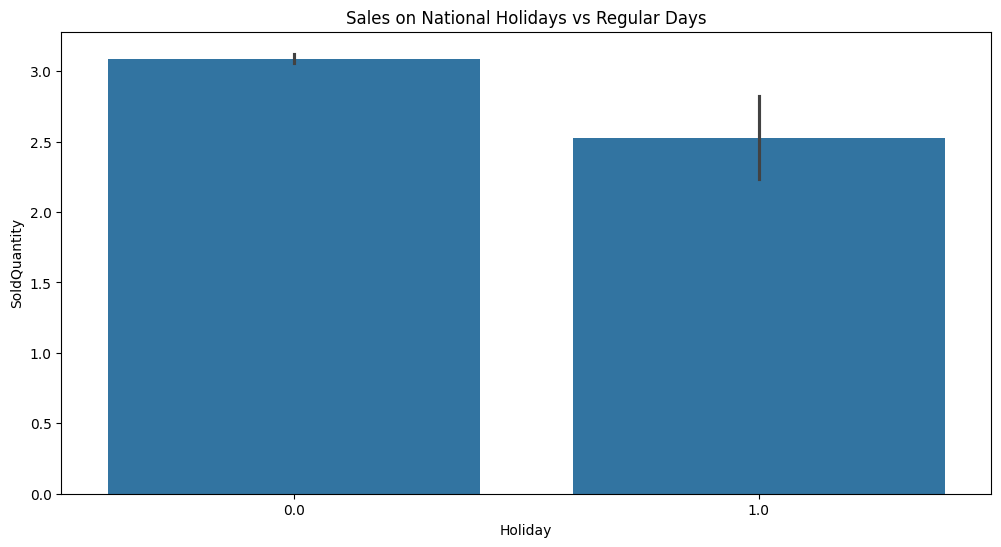

In [14]:
#checking if the weekday is a weekend or not
df['IsWeekend'] = df['Weekdays'].isin([6, 7]).astype(int)
#sales on weekdays vs weekends
plt.figure(figsize=(12, 6))
sns.barplot(x='IsWeekend', y='SoldQuantity', data=df)
plt.title('Sales on Weekdays vs Weekends')
plt.show()

#sales on national holidays vs regular days
plt.figure(figsize=(12, 6))
sns.barplot(x='Holiday', y='SoldQuantity', data=df)
plt.title('Sales on National Holidays vs Regular Days')
plt.show()



<h4>Q8. Based on the store data, identify the stocking patterns across multiple stores. Are they
provided with new products every day or restocking happens less frequently based o
your insights?<</
h4>

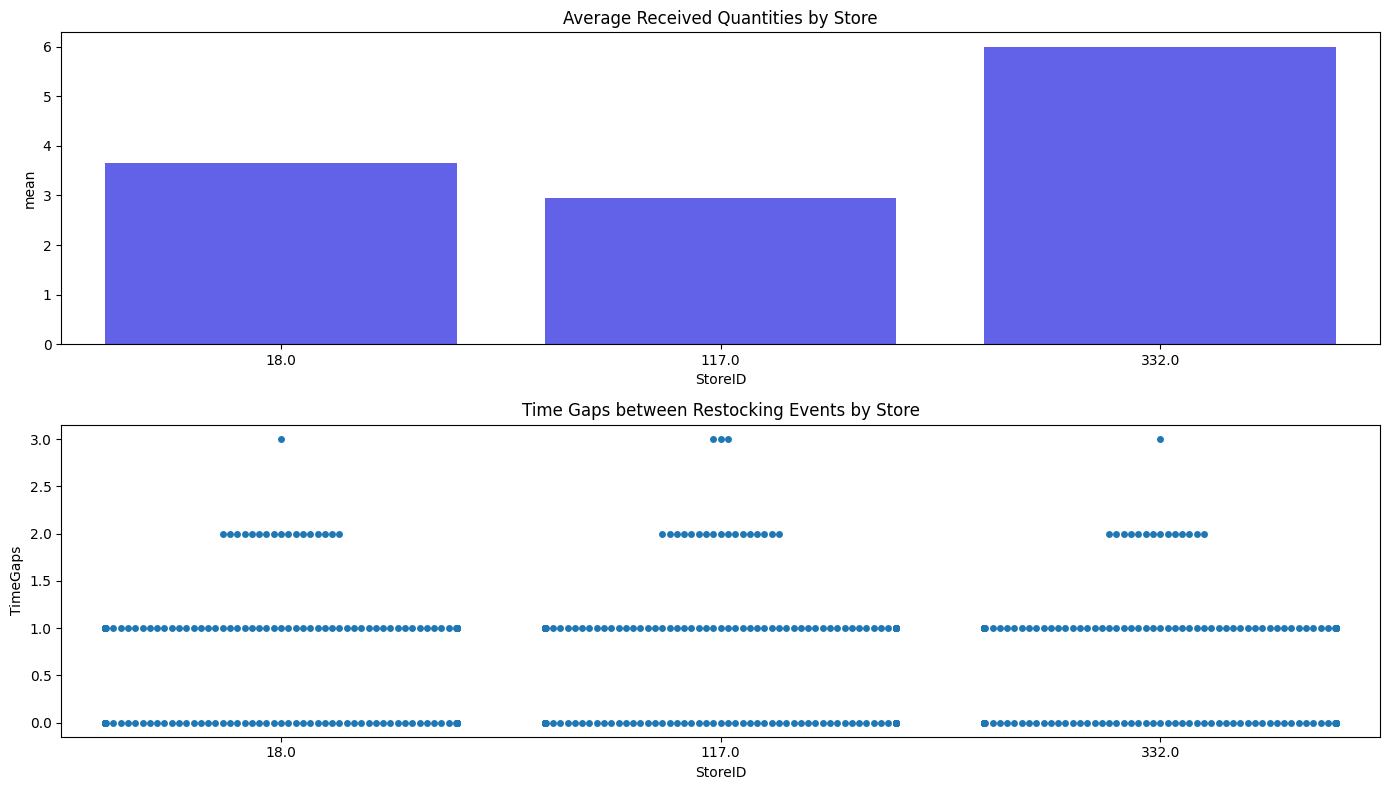

In [15]:
#storting data based on storeID
store_groups = df.groupby('StoreID')

stocking_stats = store_groups['ReceivedQuantity'].agg(['mean', 'min', 'max'])

df_sample = df.sample(frac=0.1, random_state=42)

store_groups_sample = df_sample.groupby('StoreID')

store_stocking_patterns = []
for store_id, store_data in store_groups_sample:
    store_data = store_data.sort_values(by='BusinessDate')
    time_gaps = store_data['BusinessDate'].diff().dt.days
    store_stocking_patterns.extend(zip([store_id] * len(time_gaps), time_gaps.dropna().tolist()))

time_gaps_data = pd.DataFrame(store_stocking_patterns, columns=['StoreID', 'TimeGaps'])

plt.figure(figsize=(14, 8))

#Bar graph for average recieved quantities sorted by store
plt.subplot(2, 1, 1)
sns.barplot(x=stocking_stats.index, y='mean', data=stocking_stats, color='blue', alpha=0.7)
plt.title('Average Received Quantities by Store')

#Swarmplot for time gaps between restocking events orderd by store
plt.subplot(2, 1, 2)
sns.swarmplot(x='StoreID', y='TimeGaps', data=time_gaps_data)
plt.title('Time Gaps between Restocking Events by Store')

plt.tight_layout()
plt.show()

<p>Insights:

The bar plot displays the average received quantity for each retailer, allowing you to discover locations with greater or lower inventory leve.

The swarm plot depicts the time intervals between restocking occurrences for the collected data, illustrating how frequently new items are received by retailers.</p>

<h4>Q9. Draw conclusions and suggest a recommendation to optimize the stocking.</h4>

<p>Conclusion: <br> We discovered insights into average received quantities and time intervals between refilling episodes by analyzing stocking patterns across several locations. The following are the important findings: <br>

a) Average Quantities Received:<br>
1)The bar plot depicts variations in average received volumes between retailers. <br>
Some stores receive greater numbers on a constant basis, while others receive smaller quantities on average. <br>


b) Time Differences Between Restocking Events:<br>
For the sampled shops, the swarm plot shows the distribution of time intervals between restocking occurrences. <br>
It emphasizes how frequently retailers acquire new merchandise. <br> <br>

Recommendations:<br>
a) Order Quantities Should Be Optimized:
Consider optimizing order amounts to satisfy demand in stores with consistently low average received quantities. <br>
Conduct a demand analysis to verify that orders are in line with client demands and that stockouts are avoided. <br>

b) Stocking Patterns Should Be Regularized:<br>

Determine whether establishments have abnormal time gaps between refilling activities and try to regularize inventory pattern <br>s.
Implement a more predictable replenishment plan based on demand projections and sales data from previous yea <br>rsc) .

Adjust and mo:tor:

Maintain a constant eye on stocking patterns, average volumes, and client <br>demand.
Review and alter stocking tactics on a regular basis to reflect changing market conditions and client pref<br>erd) ences.

ExamineOutliers:

Examine outliers in average numbers as well as te<br>mporal gaps.
Recognize the causes that contribute to odd stocking patterns and take remeal action.




<h2>Section 1 (Part B)</h2>

In [37]:
#storing the entire data in df1
df1 = pd.read_csv('Coffee_Stores_Data.csv')
df1.head(4)

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.0
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.0
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.0
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.0


In [15]:
missed_sales_mean = df1['MissedSales'].mean()
df1['MissedSales'].fillna(missed_sales_mean, inplace=True)

#Handling missing data for each category
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    if df1[col].isnull().sum() > 0:
        df1[col].fillna(df1[col].mean(), inplace=True)
categorical_columns = df1.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df1[col].isnull().sum() > 0:
        df1[col].fillna(mode_value, inplace=True)
print("Missing Values after Handling:")
print(df1.isnull().sum())

Missing Values after Handling:
StoreID             0
BusinessDate        0
PLU                 0
Description         0
ItemType            0
CategoryLvl1Desc    0
CategoryLvl2Desc    0
CategoryLvl3Desc    0
ReceivedQuantity    0
SoldQuantity        0
EndQuantity         0
LatestOrder         0
StockedOut          0
GroupID             0
MissedSales         0
dtype: int64


<h4>Q. Analyze the data of all stores and identify best and worst stores based on top 25% and bottom 25% and provide your insight into data.</
h4>

In [19]:
#Calculating the best stores and the worst stores
df1['TotalSales'] = df1['SoldQuantity'] + df1['LatestOrder']
store_metrics = df1.groupby('StoreID').agg({'TotalSales': 'sum'}).reset_index()
top_25_percent = store_metrics['TotalSales'].quantile(0.75)
bottom_25_percent = store_metrics['TotalSales'].quantile(0.25)

best_stores = store_metrics[store_metrics['TotalSales'] >= top_25_percent]
worst_stores = store_metrics[store_metrics['TotalSales'] <= bottom_25_percent]

print("Insights:")
print("The Best Stores are (Top 25%):")
print(best_stores['StoreID'].values)

print("\nWorst Stores are (Bottom 25%):")
print(worst_stores['StoreID'].values)

Insights:
The Best Stores are (Top 25%):
[  6  36  59  60  62  77  82 115 120 128 138 181 201 216 218 244 319 331
 332 334 335 336 341 344 348 359 363 376 377 378 379 383 392]

Worst Stores are (Bottom 25%):
[ 20  21  30  43  61  76  85  93 102 103 116 131 137 141 166 167 183 184
 202 206 211 222 235 309 328 329 346 374 375 385 397 400 401]


<h4>Q. Based on the store data, identify the stocking patterns across multiple stores. Are they
provided with new products every day or restocking happens less frequently based on
your insights?</
h4>

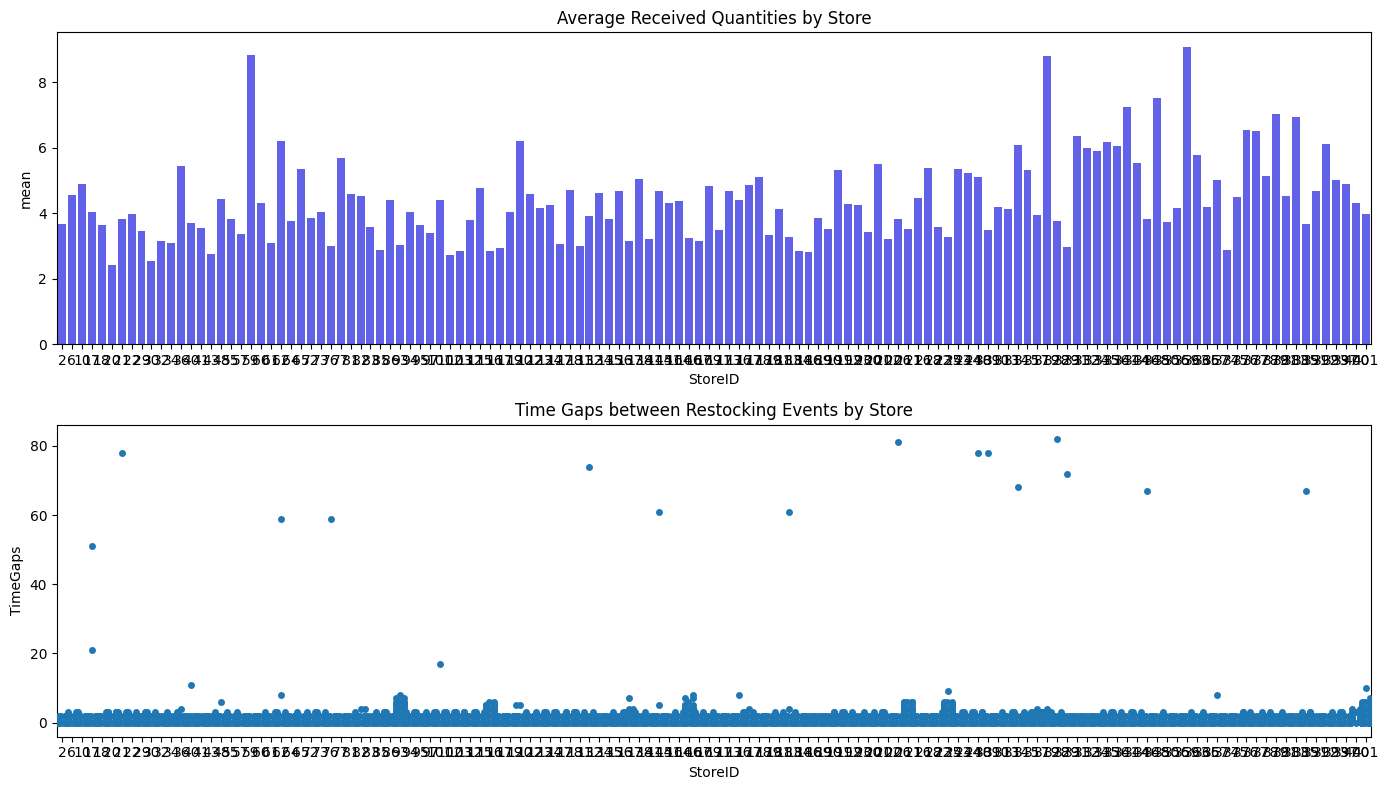

In [20]:
#converting businessdate to date objects
df1['BusinessDate'] = pd.to_datetime(df1['BusinessDate'])

store_groups = df1.groupby('StoreID')

stocking_stats = store_groups['ReceivedQuantity'].agg(['mean', 'min', 'max'])

df1_sample = df1.sample(frac=0.1, random_state=42)

store_groups_sample = df1_sample.groupby('StoreID')

#calculating store stocking pattern data
store_stocking_patterns = []
for store_id, store_data in store_groups_sample:
    store_data = store_data.sort_values(by='BusinessDate')
    time_gaps = store_data['BusinessDate'].diff().dt.days
    store_stocking_patterns.extend(zip([store_id] * len(time_gaps), time_gaps.dropna().tolist()))

time_gaps_data = pd.DataFrame(store_stocking_patterns, columns=['StoreID', 'TimeGaps'])

plt.figure(figsize=(14, 8))

#Bar graph for average recieved quantities orderd by store
plt.subplot(2, 1, 1)
sns.barplot(x=stocking_stats.index, y='mean', data=stocking_stats, color='blue', alpha=0.7)
plt.title('Average Received Quantities by Store')
plt.xticks(rotation=90)

#Swarmplot for Time Gaps between Restocking Events orderd by Store
plt.subplot(2, 1, 2)
sns.swarmplot(x='StoreID', y='TimeGaps', data=time_gaps_data)
plt.title('Time Gaps between Restocking Events by Store')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<h4>Q. Draw conclusions and suggest a recommendation to optimize the stocking.</h4>

<p>
Optimizing stocking involves leveraging data insights to efficiently manage inventory while meeting customer demand. Based on the analysis conducted:<br><br>
Conclusion: The following are the important findings: <br>


The bar plot showcases the variability in average received volumes among retailers, indicating differing patterns where some consistently receive larger quantities while others receive smaller ones. Simultaneously, the swarm plot illustrates the intervals between restocking events for sampled shops, emphasizing the varying frequencies of merchandise acquisition among retailers.. <br> <br>

Recommendations:<br>
Creating predictive stocking models using historical sales data, temperature, and pertinent variables is pivotal for precise demand forecasting. Embracing a dynamic inventory management approach enables real-time adjustments, aligning stock levels with sales patterns, seasonal fluctuations, and temperature changes. Tailoring stocking strategies for individual stores, considering their performance, sales trends, and identified patterns, optimizes efficiency and minimizes waste. Regularly evaluating and adapting stocking strategies based on evolving sales patterns, customer preferences, and seasonal shifts ensures ongoing alignment with market demands.



<h1> Section 2</h1>

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Input, Embedding, Bidirectional, Attention,  TimeDistributed
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, GRU, Attention
from tensorflow.keras.models import Model

<h4>Q1. Produce synthetic data using Generative models (GANs) to get accurate predictions
even with little historical data where necessary.</h4>

In [17]:

sales_data = df[['ReceivedQuantity', 'SoldQuantity', 'EndQuantity']].copy()

#generator for sequential data
generator = Sequential([
    Dense(10, input_dim=3),
    LeakyReLU(),
    Dense(3)
])

#disciriminator for sequential data
discriminator = Sequential([
    Dense(10, input_dim=3),
    LeakyReLU(),
    Dense(1, activation='sigmoid')
])

generator.compile(loss='mean_squared_error', optimizer='adam')
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

discriminator.trainable = False
#creating a gan model for sequential data
gan_model = Sequential([generator, discriminator])
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

batch_size = 32
epochs = 100

for epoch in range(epochs):
    noise = np.random.randn(len(sales_data), 3)
    generated_data = generator.predict(noise)

    real_labels = np.ones((len(sales_data), 1))
    fake_labels = np.zeros((len(sales_data), 1))

    d_loss_real = discriminator.train_on_batch(sales_data.values, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.randn(len(sales_data), 3)
    valid_labels = np.ones((len(sales_data), 1))

    g_loss = gan_model.train_on_batch(noise, valid_labels)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

#calculating synthetic noise and sales data
synthetic_noise = np.random.randn(len(sales_data), 3)
synthetic_sales = generator.predict(synthetic_noise)
print(synthetic_sales)



965/965 [==============================] - 4s 4ms/step


Epoch 0, D Loss: 0.7962465882301331, G Loss: 0.7773942351341248
965/965 [==============================] - 5s 5ms/step
[[-0.4297341   0.7752977   0.01407035]
 [ 0.22757256  0.42877156  0.16455746]
 [ 0.74574876  1.3137099   0.02387846]
 ...
 [-0.18525466  0.3258307   0.1917541 ]
 [-0.6637352   1.5557319  -0.272415  ]
 [-0.16100332  0.38492805  0.05311884]]


<h4>Q2. Iterate through different combinations of features to identify the optimal features and
remove potential correlated features (if any) for your predictions. Add weather,
weekdays, holidays and temperature data to your features.</h4>

In [20]:
#extracting all features from the dataset
categorical_features = df.select_dtypes(include=['object']).columns

#encoding the data
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])



numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
#calculating correlation matrix for feature selection
correlation_matrix = df.corr()
relevant_features_corr = correlation_matrix['SoldQuantity'].sort_values(ascending=False).index
selected_features_corr = relevant_features_corr[1:6]

X = df.drop('SoldQuantity', axis=1)
y = df['SoldQuantity']
X = X.dropna()
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using Randomforest regressor to calculate the importance of features
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features_rf = feature_importance.head(5).index  # Select the top 5 features according to Random Forest importance

#combining the selected features from correlation matrix and rf model
selected_features = set(selected_features_corr).union(selected_features_rf)
print(feature_importance)
print(selected_features)


ReceivedQuantity     0.555917
LatestOrder          0.141544
MissedSales          0.059079
BusinessDate         0.040589
Temperature          0.036239
PLU                  0.029437
EndQuantity          0.029209
StockedOut           0.028784
Description          0.017650
Weekdays             0.017481
CategoryLvl3Desc     0.010731
Weather Condition    0.008328
ItemType             0.006573
StoreID              0.005944
GroupID              0.005875
DriveThru            0.005222
CategoryLvl2Desc     0.000864
Holiday              0.000534
CategoryLvl1Desc     0.000000
dtype: float64
{'ReceivedQuantity', 'BusinessDate', 'StoreID', 'DriveThru', 'MissedSales', 'GroupID', 'Temperature', 'LatestOrder'}


<h4>Q3. Start with a quick linear regression to get a sense of data. Linear regression
may not result in a great prediction.</h4>

In [21]:
#Selecting the featues from the above models output
selected_features = ['DriveThru', 'StoreID', 'EndQuantity', 'Temperature', 'BusinessDate', 'LatestOrder', 'ReceivedQuantity', 'MissedSales', 'PLU', 'StockedOut']

X = df[selected_features]
y = df['SoldQuantity']
X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Performing Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error on Test Data (Linear Regression): {mse_linear}")


Mean Squared Error on Test Data (Linear Regression): 3.0583843896124456


<h4>Q4. Use ensemble models. Develop the following models and compare the accuracies by
appropriate metric.
a. Random Forest
b. Gradient Boosting Machine
c. XGBoost
Perform a quick sensitivity analysis on the parameters of the model and try to finetune
the default values where you see an opportunity to improve the model. </h4>

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Random Forest with hyperparameters
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

# Gradient Boosting Machine with hyperparameters
gbm_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_grid = GridSearchCV(gbm_model, gbm_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gbm_grid.fit(X_train, y_train)
gbm_best_model = gbm_grid.best_estimator_

# XGBoost with hyperparameters
xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}

xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_

# Evaluate the best models
models = [
    ('Random Forest', rf_best_model),
    ('Gradient Boosting', gbm_best_model),
    ('XGBoost', xgb_best_model)
]

for model_name, best_model in models:
    print(f"Metrics for {model_name}:")
    print("Best Parameters:", best_model.get_params())

    # Predictions and Evaluation
    pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    print("\n")


Metrics for Random Forest:
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Mean Squared Error: 1.4482785982041553
R-squared: 0.8330034966824438


Metrics for Gradient Boosting:
Best Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Mean S

<h4>Q5. Document and highlight model improvements. Extra credit will be considered for team’s
effort on improvements. (5 points)</h4>

<h4>Q6. As we are dealing with time-series data, we would like to compare the results of the
previous models with the following deep methods:
a. CNN
b. LSTM
c. Transformer or any sequence-to-sequence model with attention mechanism.
You only need to implement one, but if you implement transformer and any
other network with attention (for example, RNN with attention) </h4>

In [23]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, GRU, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Attention
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN/GRU/LSTM input
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

def evaluate_model(model, X_test_cnn, y_test):
    predictions = model.predict(X_test_cnn)
    mse = np.mean(np.square(predictions.flatten() - y_test))
    mae = np.mean(np.abs(predictions.flatten() - y_test))
    r2 = r2_score(y_test, predictions.flatten())

    print("Loss (MSE):", mse)
    print("Mean Absolute Error:", mae)
    print("R^2 Score:", r2)
    print("\n")

# Define GRU model
input_layer = Input(shape=(X_train_cnn.shape[1], 1))
gru_layer = GRU(50, return_sequences=True)(input_layer)
attention_output = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_output)
dense_layer = Dense(1, activation='linear')(flatten_layer)  # Use linear activation for regression
gru_model = Model(inputs=input_layer, outputs=dense_layer)

gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])  # Use MSE for regression
gru_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

# Evaluate GRU model
print("GRU Model Evaluation:")
evaluate_model(gru_model, X_test_cnn, y_test)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')  # Use linear activation for regression
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

# Evaluate CNN model
print("CNN Model Evaluation:")
evaluate_model(cnn_model, X_test_cnn, y_test)

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_cnn.shape[1], 1)),
    Dense(1, activation='linear')  # Use linear activation for regression
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
lstm_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

# Evaluate LSTM model
print("LSTM Model Evaluation:")
evaluate_model(lstm_model, X_test_cnn, y_test)


Epoch 1/10
386/386 [==============================] - 15s 26ms/step - loss: 4.8216 - mean_absolute_error: 1.5343 - val_loss: 2.4262 - val_mean_absolute_error: 1.0829
Epoch 2/10
386/386 [==============================] - 10s 26ms/step - loss: 2.3354 - mean_absolute_error: 1.0380 - val_loss: 2.1953 - val_mean_absolute_error: 0.9902
Epoch 3/10
386/386 [==============================] - 10s 26ms/step - loss: 2.1860 - mean_absolute_error: 0.9978 - val_loss: 2.2074 - val_mean_absolute_error: 0.9692
Epoch 4/10
386/386 [==============================] - 8s 21ms/step - loss: 2.1177 - mean_absolute_error: 0.9767 - val_loss: 2.0418 - val_mean_absolute_error: 0.9425
Epoch 5/10
386/386 [==============================] - 7s 18ms/step - loss: 2.0530 - mean_absolute_error: 0.9555 - val_loss: 1.9877 - val_mean_absolute_error: 0.9305
Epoch 6/10
386/386 [==============================] - 8s 19ms/step - loss: 1.9957 - mean_absolute_error: 0.9366 - val_loss: 1.9073 - val_mean_absolute_error: 0.9144
Epoch 7

<h4>Q7. Based on the results from the models above, we would like to predict sales based on the
following scheme:
a. Weather forecast i) 1 day ahead ii) 3 days ahead (shipping from corporate
warehouse) iii)10 days ahead (distributer order to the manufacturer)</h4>

In [27]:
# Sample mock functions for sales data prediction and data preparation
from tabulate import tabulate
def data_ahed_1_day():
    return {
        'DriveThru': 1,
        'StoreID': 332,
        'EndQuantity': 0,
        'Temperature': 92,
        'BusinessDate': 310,
        'LatestOrder': 0,
        'ReceivedQuantity': 6,
        'MissedSales': 0,
        'PLU': 830620,
        'StockedOut':0
    }

def data_ahed_3_days():
    return {
        'DriveThru':0,
        'StoreID':117,
        'EndQuantity': 1,
        'Temperature': 72,
        'BusinessDate': 310,
        'LatestOrder': 13,
        'ReceivedQuantity': 2,
        'MissedSales': 0,
        'PLU': 3000227,
        'StockedOut':0
    }

def data_ahed_10_days():
    return {
        'DriveThru':0,
        'StoreID':18,
        'EndQuantity': 4,
        'Temperature': -41,
        'BusinessDate': 310,
        'LatestOrder': 9 ,
        'ReceivedQuantity': 4,
        'MissedSales': 0,
        'PLU': 3000227,
        'StockedOut':0

    }

def prepare_input_data(predicted_data):
    return np.array(list(predicted_data.values())).reshape(1, -1)  # Convert weather data to array format


data_ahed_1_day = data_ahed_1_day()
data_ahed_3_days = data_ahed_3_days()
data_ahed_10_days = data_ahed_10_days()

input_data_1_day = prepare_input_data(data_ahed_1_day)
input_data_3_days = prepare_input_data(data_ahed_3_days)
input_data_10_days = prepare_input_data(data_ahed_10_days)

# Predict sales for each time interval using different models
sales_prediction_1_rf = rf_best_model.predict(input_data_1_day)  # Random Forest
sales_prediction_3_rf = rf_best_model.predict(input_data_3_days)
sales_prediction_10_rf = rf_best_model.predict(input_data_10_days)

sales_prediction_1_gbm = gbm_best_model.predict(input_data_1_day)
sales_prediction_3_gbm = gbm_best_model.predict(input_data_3_days)  # Gradient Boosting
sales_prediction_10_gbm =gbm_best_model.predict(input_data_10_days)

sales_prediction_1_xgb = xgb_best_model.predict(input_data_1_day)
sales_prediction_3_xgb = xgb_best_model.predict(input_data_3_days)
sales_prediction_10_xgb = xgb_best_model.predict(input_data_10_days)  # XGBoost

# For deep learning models - GRU, CNN, LSTM
sales_prediction_1_day_gru = gru_model.predict(input_data_1_day)  # GRU
sales_prediction_3_day_gru = gru_model.predict(input_data_3_days)
sales_prediction_10_day_gru = gru_model.predict(input_data_10_days)

sales_prediction_1_day_cnn= cnn_model.predict(input_data_1_day)  # CNN
sales_prediction_3_day_cnn= cnn_model.predict(input_data_3_days)
sales_prediction_10_day_cnn = cnn_model.predict(input_data_10_days)



sales_prediction_1_day_lstm = lstm_model.predict(input_data_1_day)  # LSTM
sales_prediction_3_day_lstm = lstm_model.predict(input_data_3_days)  # LSTM
sales_prediction_10_day_lstm = lstm_model.predict(input_data_10_days)  # LSTM

print('-----------------------------')
# Define a function to format the predictions in a table
def format_predictions_table(model_name, interval, predictions):
    return [model_name, interval, predictions]

# Initialize a list to store all predictions
all_predictions = []

# Append predictions to the list
all_predictions.append(format_predictions_table("Random Forest", "1 day", sales_prediction_1_rf))
all_predictions.append(format_predictions_table("Random Forest", "3 days", sales_prediction_3_rf))
all_predictions.append(format_predictions_table("Random Forest", "10 days", sales_prediction_10_rf))

all_predictions.append(format_predictions_table("Gradient Boosting", "1 day", sales_prediction_1_gbm))
all_predictions.append(format_predictions_table("Gradient Boosting", "3 days", sales_prediction_3_gbm))
all_predictions.append(format_predictions_table("Gradient Boosting", "10 days", sales_prediction_10_gbm))

all_predictions.append(format_predictions_table("XGBoost", "1 day", sales_prediction_1_xgb))
all_predictions.append(format_predictions_table("XGBoost", "3 days", sales_prediction_3_xgb))
all_predictions.append(format_predictions_table("XGBoost", "10 days", sales_prediction_10_xgb))

all_predictions.append(format_predictions_table("GRU", "1 day", sales_prediction_1_day_gru))
all_predictions.append(format_predictions_table("GRU", "3 days", sales_prediction_3_day_gru))
all_predictions.append(format_predictions_table("GRU", "10 days", sales_prediction_10_day_gru))

all_predictions.append(format_predictions_table("CNN", "1 day", sales_prediction_1_day_cnn))
all_predictions.append(format_predictions_table("CNN", "3 days", sales_prediction_3_day_cnn))
all_predictions.append(format_predictions_table("CNN", "10 days", sales_prediction_10_day_cnn))

all_predictions.append(format_predictions_table("LSTM", "1 day", sales_prediction_1_day_lstm))
all_predictions.append(format_predictions_table("LSTM", "3 days", sales_prediction_3_day_lstm))
all_predictions.append(format_predictions_table("LSTM", "10 days", sales_prediction_10_day_lstm))

# Print all predictions in a single table
header = ["Model", "Interval", "Sales Prediction"]
print(tabulate(all_predictions, headers=header, tablefmt="pretty"))

1/1 [==============================] - 0s 54ms/step
-----------------------------
+-------------------+----------+------------------+
|       Model       | Interval | Sales Prediction |
+-------------------+----------+------------------+
|   Random Forest   |  1 day   |   [0.13172754]   |
|   Random Forest   |  3 days  |   [1.59633377]   |
|   Random Forest   | 10 days  |   [1.73975691]   |
| Gradient Boosting |  1 day   |   [0.50532183]   |
| Gradient Boosting |  3 days  |   [1.59710679]   |
| Gradient Boosting | 10 days  |   [1.48017267]   |
|      XGBoost      |  1 day   |   [0.48761794]   |
|      XGBoost      |  3 days  |   [1.6135256]    |
|      XGBoost      | 10 days  |   [1.4429774]    |
|        GRU        |  1 day   |  [[7.8358917]]   |
|        GRU        |  3 days  |   [[5.764243]]   |
|        GRU        | 10 days  |  [[2.9183934]]   |
|        CNN        |  1 day   |  [[762122.56]]   |
|        CNN        |  3 days  |   [[2752509.]]   |
|        CNN        | 10 days  |  

<h4>Q7.b. What models provide the best prediction for the sales forecast 1 day from today,
3 days from today and 10 days from today.</h4>

In [34]:
#explain based on the above quest

<h4>Q8. Use 80% of data for training and 20% of data for testing. Compare the model accuracy
for training and test data sets.</h4>

In [33]:
# Splitting data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluation for each model
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('CNN', cnn_model),
    ('LSTM', lstm_model),
    ('GRU with Attention', gru_model)
]

for model_name, model in models:
    if model_name in ['CNN', 'LSTM', 'GRU with Attention']:
        model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=0)
        train_acc = model.evaluate(X_train_cnn, y_train, verbose=0)[1]
        test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)[1]
        print(f"{model_name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    else:
        model.fit(X_train, y_train)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        print(f"{model_name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Random Forest - Training Accuracy: 0.9742, Test Accuracy: 0.8315
Gradient Boosting - Training Accuracy: 0.8141, Test Accuracy: 0.8223
XGBoost - Training Accuracy: 0.9004, Test Accuracy: 0.8381
CNN - Training Accuracy: 0.8054, Test Accuracy: 0.8009
LSTM - Training Accuracy: 0.8744, Test Accuracy: 0.8715
GRU with Attention - Training Accuracy: 0.8173, Test Accuracy: 0.8093


<h4>Q9. For individual store data, teams 1-10 focus on the first 13 products and groups 11-25
focus on the second 14 products. Eliminate the products that are not common between
your three stores.
</h4>

In [11]:
df = pd.read_csv('/content/drive/MyDrive/AIproject/Coffee_Stores_Modified1.csv')
store_18_products = df[df['StoreID'] == 18]['Description'].unique()[:13]
store_117_products = df[df['StoreID'] == 117]['Description'].unique()[:13]
store_332_products = df[df['StoreID'] == 332]['Description'].unique()[:13]
common_products = set(store_18_products) & set(store_117_products) & set(store_332_products)
common_products_list = list(common_products)

print("Products common to all three stores:", common_products_list)

Products common to all three stores: ['Vive Juice Shot', 'Jalapeno Cheese Bagel', 'Cinnamon Roll', 'Plain Bagel', 'Chocolate Croissant', 'Butter Croissant', 'Everything Bagel', 'Mixed Berries & Granola Yogurt Parfait', 'Blueberry Scone', 'Breakfast Burrito Egg Beans & Rice', 'Caprese Sandwich', 'Honey Raisin Bran Muffin']


<h4>Q10. Find the best models across all stores (the model with best predictions, i.e., the lowest error) Apply the individual store model to 10 other stores. Discuss the accuracy and where to improve. Note if the models heavily depend on the weather data, you may need to remove that feature from your data set for predictions of the remaining stores. Average US daily temperature could be a great substitute. </h4>

In [46]:
le = LabelEncoder()

# Encoding 'BusinessDate' for the whole dataset
df1['BusinessDate'] = le.fit_transform(df1['BusinessDate'])

# Training the XGBoost model on the whole data
X = df1[['GroupID', 'StoreID', 'EndQuantity', 'BusinessDate', 'LatestOrder', 'ReceivedQuantity', 'MissedSales', 'PLU', 'StockedOut']]
y = df1['SoldQuantity']

xgb_best_model = XGBRegressor()
xgb_best_model.fit(X, y)

#Getting X_test and y_test from any 10 stores in the data
store_ids_10_stores = [2, 6, 10, 17, 18, 20, 21, 22, 29, 34]

# Filter data for the selected 10 stores
df_10_stores = df1[df1['StoreID'].isin(store_ids_10_stores)]

# Encoding 'BusinessDate' for X_test_10_stores using the same LabelEncoder instance
df_10_stores['BusinessDate'] = le.transform(df_10_stores['BusinessDate'])

#data from the 10 stores
X_test_10_stores = df_10_stores[['GroupID', 'StoreID', 'EndQuantity', 'BusinessDate', 'LatestOrder', 'ReceivedQuantity', 'MissedSales', 'PLU', 'StockedOut']]
y_test_10_stores = df_10_stores['SoldQuantity']

# Evaluate using XGBoost model on the 10 stores
y_pred_10_stores = xgb_best_model.predict(X_test_10_stores)

mse_10_stores = mean_squared_error(y_test_10_stores, y_pred_10_stores)
r2_10_stores = r2_score(y_test_10_stores, y_pred_10_stores)
print("Mean Squared Error (MSE) on 10 stores:", mse_10_stores)
print("R-squared (R2) on 10 stores:", r2_10_stores)


Mean Squared Error (MSE) on 10 stores: 1.3108238138094963
R-squared (R2) on 10 stores: 0.8058670597683616


<h4> ExplainerDashboard </h4>

In [30]:
!pip install explainerdashboard
from explainerdashboard import RegressionExplainer, ExplainerDashboard

explainer = RegressionExplainer(xgb_best_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
Changing class type to XGBRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
explainer = RegressionExplainer(rf_best_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate

TypeError: ignored

In [ ]:
explainer = RegressionExplainer(gbm_best_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')

In [ ]:
explainer = RegressionExplainer(gru_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')

In [ ]:
explainer = RegressionExplainer(cnn_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')

In [ ]:
explainer = RegressionExplainer(lstm_model, X_test, y_test)
ExplainerDashboard(explainer).run(port=8050, host='127.0.0.1')